In [38]:
import pandas as pd
import numpy as np
df = pd.read_csv("../saved/5m_journal_conf_comp_sci_last_20.csv")
# df = pd.read_csv("../saved/250k_journal_conf_last20.csv")

In [39]:
df.columns.tolist()

['PaperId',
 'Abstract',
 'Author_1',
 'Author_10',
 'Author_11',
 'Author_2',
 'Author_3',
 'Author_4',
 'Author_5',
 'Author_6',
 'Author_7',
 'Author_8',
 'Author_9',
 'CitationCount',
 'CitationCountPerYear',
 'FieldOfStudy_0',
 'FieldOfStudy_1',
 'FieldOfStudy_2',
 'FieldOfStudy_3',
 'FieldOfStudy_4',
 'FieldOfStudy_5',
 'FirstPage',
 'JournalName',
 'LastPage',
 'PaperId.1',
 'PublishedDate',
 'Publisher',
 'Rank',
 'Title',
 'YearsSincePublication',
 'AuthorProminence',
 'MagBin',
 'CitationBin']

In [40]:
df_cs = df.loc[df["FieldOfStudy_0"] == "computer science"]
cc = df_cs["CitationCount"].values
cc.shape

(229061,)

In [41]:
print(f"Max number of citations: {np.max(cc)}")
print(f"Median number of citations: {np.median(cc)}")
print(f"Mean number of citations: {np.mean(cc)}")
print(f"Std number of citations: {np.std(cc)}")

print(f"Number of papers with 0 citations: {np.sum((cc == 0))}")
print(f"Number papers with over 50 citations: {np.sum(cc > 50)}")
print(f"Number papers with over 100 citations: {np.sum(cc > 100)}")
print(f"Number papers with over 1k citations: {np.sum(cc > 1000)}")
print(f"Number papers with over 10k citations: {np.sum(cc > 10000)}")


Max number of citations: 49713
Median number of citations: 3.0
Mean number of citations: 20.086941906304435
Std number of citations: 181.52074070402878
Number of papers with 0 citations: 54324
Number papers with over 50 citations: 19380
Number papers with over 100 citations: 8873
Number papers with over 1k citations: 349
Number papers with over 10k citations: 9


KElbowVisualizer(ax=<AxesSubplot:>, k=None, model=None)

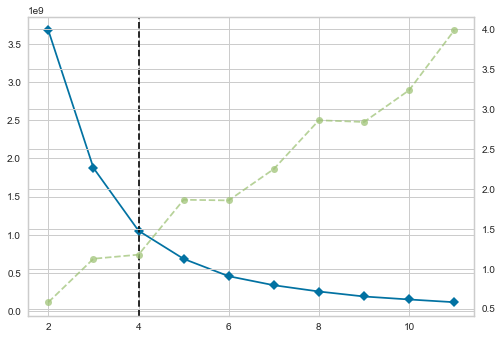

In [42]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(cc.reshape(-1, 1))

In [44]:
clstr = KMeans(n_clusters=4, random_state=0)
clstr.fit(cc.reshape(-1,1))
clstr.cluster_centers_

array([[1.58012881e+01],
       [4.40030000e+04],
       [1.48108351e+03],
       [8.35630435e+03]])

In [43]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=4, random_state=0)
gmm.fit(cc.reshape(-1,1))
gmm.means_

array([[  1.29617894],
       [740.75744486],
       [ 87.89289081],
       [ 10.4972774 ]])

In [22]:
gmm.predict([[3]])

array([0])

In [48]:
df_cs.drop(labels=[
'PaperId',
'Author_1',
'Author_10',
'Author_11',
'Author_2',
'Author_3',
'Author_4',
'Author_5',
'Author_6',
'Author_7',
'Author_8',
'Author_9',
'FieldOfStudy_0',
'FieldOfStudy_1',
'FieldOfStudy_2',
'FieldOfStudy_3',
'FieldOfStudy_4',
'FieldOfStudy_5',
'FirstPage',
'JournalName',
'LastPage',
'PaperId.1',
'PublishedDate',
'Publisher'
], inplace=True, axis=1)

,Abstract,CitationCount,CitationCountPerYear,Rank,Title,YearsSincePublication,AuthorProminence,MagBin,CitationBin,BinnedCitations
8,Fingertips detection has been used in many app...,26,2.636111,19261,An Efficient Real Time Method of Fingertip Det...,9.863014,0,1,0,3
12,We consider synchronization techniques require...,105,8.666893,18755,Synchronization of cooperative base stations,12.115068,0,1,0,3
18,Business Process Management (BPM) remains an i...,1,0.077726,22847,Strategies to Increase Executive Commitment to...,12.865753,0,2,0,0
47,Malan is a MApping LANguage that allows the g...,13,1.069416,20890,Malan: a mapping language for the data manipul...,12.156164,0,2,0,3
62,"In usability testing, eye tracking has been us...",19,1.345818,20985,Is Eye Tracking the Next Step in Usability Tes...,14.117808,0,2,0,3


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def correlation(df, columns=None, plot=True):
    t = df.loc[:, columns] if columns else df
    if not plot:
        print(t.corr())
    else:
        fig = plt.figure()
        mask = np.triu(t.corr())
        sns.heatmap(
            t.corr(),
            mask=mask,
            cbar=False,
            square=True,
            annot=True,
            vmin=-1,
            vmax=1,
            center=0,
            cmap="coolwarm_r",
            linecolor="black",
        )
        plt.show()

In [45]:
def custom_binning(x):
    if x <= 4: 
        return 1
    elif x <= 10:
        return 2
    elif x <= 100:
        return 3
    else:
        return 4


In [49]:
df_cs["BinnedCitations"] = pd.Series([custom_binning(x) for x in cc], index=df_cs.index)
# df_cs["BinnedCitations"] = pd.Series(gmm.predict(cc.reshape(-1,1)).reshape(-1,), index=df_cs.index)
df_cs.head()

,Abstract,CitationCount,CitationCountPerYear,Rank,Title,YearsSincePublication,AuthorProminence,MagBin,CitationBin,BinnedCitations
0,There are many application areas for wireless ...,3,0.346848,20673,Voice over ZigBee wireless sensor network appl...,8.649315,0,2,0,1
1,Two important automation characteristics are c...,2,0.354025,22262,Crossing the boundaries of automation-Function...,5.649315,0,2,0,1
2,The Japan Meteorological Agency (JMA) has deve...,2,0.202048,20399,An Advanced System for Monitoring Geomagnetic ...,9.898630,0,2,0,1
3,Many Internet of Things (IoT) technologies h...,26,5.220022,18697,EasyConnect: A Management System for IoT Devic...,4.980822,1,1,0,3
4,The increasing number of published web service...,3,0.359724,22061,A framework for service discovery based on str...,8.339726,1,2,0,1


In [18]:
df_cs = df.loc[df["FieldOfStudy_0"] == "computer science"]
df_cs.head()

,PaperId,Abstract,Author_1,Author_10,Author_11,Author_12,Author_13,Author_14,Author_15,Author_2,...,LastPage,PaperId.1,PublishedDate,Publisher,Rank,Title,YearsSincePublication,AuthorProminence,MagBin,CitationBin
8,21,Fingertips detection has been used in many app...,2.250426e+09,NaN,NaN,NaN,NaN,NaN,NaN,2.106871e+09,...,NaN,1610614779,2011-01-01,NaN,19261,An Efficient Real Time Method of Fingertip Det...,9.863014,0,1,0
12,28,We consider synchronization techniques require...,2.274073e+09,NaN,NaN,NaN,NaN,NaN,NaN,2.878536e+09,...,334,2147486330,2008-10-01,IEEE,18755,Synchronization of cooperative base stations,12.115068,0,1,0
18,40,Business Process Management (BPM) remains an i...,2.145050e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1631,805310189,2008-01-01,NaN,22847,Strategies to Increase Executive Commitment to...,12.865753,0,2,0
47,99,Malan is a MApping LANguage that allows the g...,2.102816e+09,NaN,NaN,NaN,NaN,NaN,NaN,2.559648e+09,...,75,2013275448,2008-09-16,ACM,20890,Malan: a mapping language for the data manipul...,12.156164,0,2,0
62,137,"In usability testing, eye tracking has been us...",2.484060e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,242,2147496745,2006-10-01,IEEE,20985,Is Eye Tracking the Next Step in Usability Tes...,14.117808,0,2,0


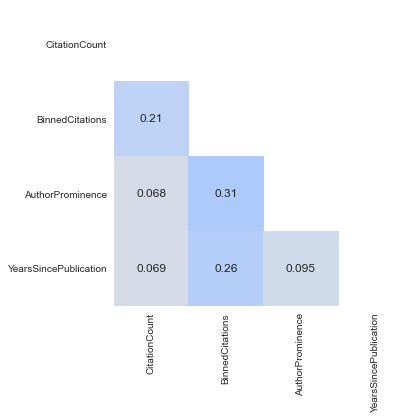

In [50]:
correlation(df_cs, columns=[
    "CitationCount",
    "BinnedCitations",
    "AuthorProminence",
    "YearsSincePublication"
])